<a href="https://colab.research.google.com/github/raksasatidor/Day2_AINusantara/blob/main/Copy_of_Day2_AINusantara.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


938/938 ━━━━━━━━━━━━━━━━━━━━ 103s 99ms/step - accuracy: 0.7184 - loss: 0.8428 - val_accuracy: 0.9824 - val_loss: 0.0508
Epoch 2/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 88ms/step - accuracy: 0.9501 - loss: 0.1692 - val_accuracy: 0.9877 - val_loss: 0.0353
Epoch 3/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 78s 83ms/step - accuracy: 0.9658 - loss: 0.1184 - val_accuracy: 0.9894 - val_loss: 0.0298
Epoch 4/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 83ms/step - accuracy: 0.9711 - loss: 0.1011 - val_accuracy: 0.9918 - val_loss: 0.0249
Epoch 5/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 83ms/step - accuracy: 0.9751 - loss: 0.0832 - val_accuracy: 0.9927 - val_loss: 0.0236
Epoch 6/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 78s 83ms/step - accuracy: 0.9787 - loss: 0.0714 - val_accuracy: 0.9924 - val_loss: 0.0242
Epoch 7/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 79s 84ms/step - accuracy: 0.9798 - loss: 0.0694 - val_accuracy: 0.9941 - val_loss: 0.0211
Epoch 8/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 84ms/step - accuracy: 0.9825 - loss: 0.0613 - val_accura

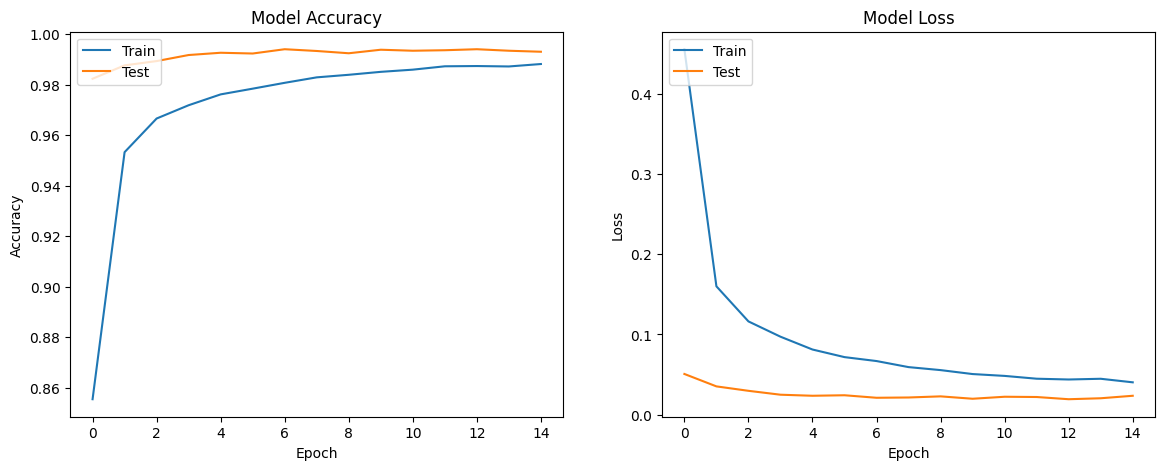

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


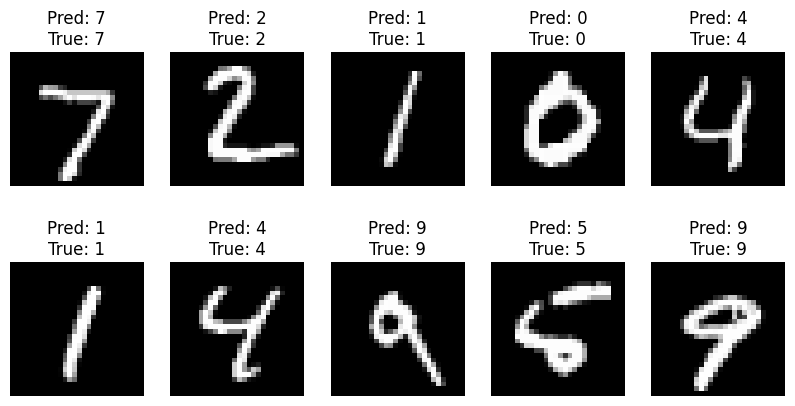

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Load and preprocess the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)

datagen.fit(x_train)

# Define a CNN model with adjusted pooling
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),  # Reduced depth
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Add dropout to reduce overfitting
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with data augmentation
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=15,
                    validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

# Visualize some predictions
import numpy as np

predictions = model.predict(x_test)

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {np.argmax(predictions[i])}\nTrue: {np.argmax(y_test[i])}")
    plt.axis('off')

plt.show()

# Save the model to a file
model.save('mnist_cnn_model.h5')

